In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# antes de empezar vamos a leer los datos, con el método .read_csv (o excel o...)
#tmb usamos el método .head(1) para ver la primera fila
df_flight = pd.read_csv("Customer Flight Activity.csv")
df_flight.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
211409,558854,2018,1,7,3,10,1680,168.0,0,0
373737,202716,2018,11,0,0,0,0,0.0,0,0
215420,768012,2018,1,7,5,12,1188,118.0,0,0
55568,360256,2017,4,0,0,0,0,0.0,0,0
242816,775639,2018,4,5,4,9,1728,215.0,0,0
20607,298869,2017,2,4,0,4,304,30.0,0,0
84708,110422,2017,6,0,0,0,0,0.0,0,0
287974,135382,2018,6,1,1,2,2598,259.0,0,0
267228,829476,2018,4,0,0,0,0,0.0,0,0
158882,462247,2017,10,0,0,0,0,0.0,0,0


In [3]:
# vemos la cantidad de filas y columnas
df_flight.shape
# este archivo tiene 405.624 filas y 10 columnas

(405624, 10)

In [4]:
# el tipo de datos
df_flight.info()
# todos los datos son de tipo integer excepto la columna 'points accumulated' que es de tipo float. No tiene valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [5]:
#cuántas filas hay duplicadas
df_flight.duplicated().sum()
# tiene 1864 filas duplicadas en un archivo de 405624, lo que supone un 4.6% del total. es un porcentaje muy bajo, por lo
# que eliminaremos estos duplicados

1864

In [6]:
df_flight = df_flight.drop_duplicates()

In [7]:
df_flight.duplicated().sum()

0

In [8]:
df_flight['Loyalty Number'].duplicated().sum()

387023

In [9]:
df_flight['Year'].unique()

array([2017, 2018], dtype=int64)

In [10]:
# a simple vista parece que las columnas 'points redeemed' y dollar cost points redeemed' sólo tienen ceros, lo comprobamos
df_flight['Points Redeemed'].value_counts()
# no todo son ceros, pero de 405624 registros, 381443 son ceros,o lo que es lo mismo, un 94% de los registros son 0.


Points Redeemed
0      379579
447       103
523       100
443        98
516        97
        ...  
834         1
858         1
862         1
869         1
859         1
Name: count, Length: 587, dtype: int64

In [11]:
# como es un porcentaje muy alto de ceros y ésta columna no es relevante para nuestro análisis la eliminamos.
df_flight.drop("Points Redeemed", axis = 1, inplace = True)

In [12]:
df_flight['Dollar Cost Points Redeemed'].value_counts()
# con ésta columna pasa lo mismo que con la anterior, la eliminamos también.

Dollar Cost Points Redeemed
0     379579
36      1037
38      1001
40       993
42       983
39       943
44       923
41       913
37       887
43       877
35       852
34       844
32       817
33       800
45       779
30       772
46       753
31       722
47       675
48       638
28       598
29       596
50       595
49       568
52       482
51       435
27       421
54       402
26       379
53       377
56       365
55       343
57       274
58       265
60       260
59       219
25       209
61       175
63       175
62       155
64       152
24       110
66       106
65        90
68        85
67        68
70        38
69        28
71         2
Name: count, dtype: int64

In [13]:
df_flight.drop("Dollar Cost Points Redeemed", axis = 1, inplace = True)

In [14]:
df_flight.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated
0,100018,2017,1,3,0,3,1521,152.0


In [15]:
df_loyalty = pd.read_csv("Customer Loyalty History.csv")
df_loyalty.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
7539,684776,Canada,Ontario,Toronto,P2T 6G3,Female,Bachelor,62604.0,Married,Nova,7243.87,Standard,2014,11,NaN,NaN
2442,146028,Canada,Quebec,Montreal,H4G 3T4,Female,College,NaN,Single,Aurora,8152.24,Standard,2014,6,NaN,NaN
11614,605926,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,57022.0,Married,Star,2691.70,Standard,2013,12,NaN,NaN
13458,283066,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,54792.0,Divorced,Star,5205.75,Standard,2018,7,NaN,NaN
1262,152423,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,75642.0,Married,Aurora,5532.86,Standard,2012,8,NaN,NaN


In [16]:
df_loyalty.shape

(16737, 16)

In [17]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [18]:
df_loyalty.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [19]:
#las columnas 'Cancellation Year' y 'Cancellation Month', tienen demasiados nulos, en concreto un 87,7%, y además no son
# relevantes para nuestro análisis por lo que las eliminamos.
df_loyalty.drop("Cancellation Year", axis = 1, inplace = True)

In [19]:
df_flight.duplicated().sum()

0

In [20]:
# voy a ver qué tipos de valores únicos tengo dentro de cada columna sobre las que voy a trabajar posteriormente.

# 1º creo una variable con las columnas que me interesa explorar:

columnas_de_interes = df_flight[['Flights Booked', 'Distance', 'Points Accumulated']]

# 2º creo una función para recorrer cada columna y ver qué valores únicos contienen:

for col in columnas_de_interes:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{col.upper()}' -----------\n")
    print(f"Sus valores únicos son: {df_flight[col].unique()}\n")
    print(f"Las frecuencias de los valores únicos de esta columna son:\n {df_flight[col].value_counts()} ")

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'FLIGHTS BOOKED' -----------

Sus valores únicos son: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]

Las frecuencias de los valores únicos de esta columna son:
 Flights Booked
0     196128
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: count, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'DISTANCE' -----------

Sus valores únicos son: [1521 2030 1200 ... 1217  617 4135]

Las frecuencias de los valores únicos de esta columna son:
 Distance
0       196128
2520       410
2880       401
1680       389
2160       365
         ...  
1333         1
3722         1
3985         1
4779         1
4135         1
Name: count, Length: 4746, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COL

In [21]:

# Hago lo mismo con las columnas que me interesan del 2º dataframe:

columnas_de_interes2 = df_loyalty[['Salary', 'Education', 'Loyalty Card', 'Marital Status', 'Gender']]

for col in columnas_de_interes2:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{col.upper()}' -----------\n")
    print(f"Sus valores únicos son: {df_loyalty[col].unique()}\n")
    print(f"Las frecuencias de los valores únicos de las categorías son:\n {df_loyalty[col].value_counts()} ")

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'SALARY' -----------

Sus valores únicos son: [ 83236.     nan 103495. ...  76178.  91970. -57297.]

Las frecuencias de los valores únicos de las categorías son:
 Salary
 101933.0    23
 62283.0     14
 61809.0     14
 51573.0     14
 64001.0     13
             ..
 95907.0      1
 72440.0      1
 88633.0      1
 100572.0     1
-57297.0      1
Name: count, Length: 5890, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'EDUCATION' -----------

Sus valores únicos son: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

Las frecuencias de los valores únicos de las categorías son:
 Education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'LOYALTY CARD' -----------

Sus valores únicos son: ['Star' 'Aurora' 'Nova']

Las frecuencias de los valores únicos

In [22]:
# en la columna salary hay valores en negativo y nan, vamos a gestionarlos:
df_loyalty['Salary'] = df_loyalty['Salary'].abs()

In [23]:
df_loyalty['Salary'].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970.,  57297.])

In [24]:
df_loyalty['Salary'].isnull().sum() / df_loyalty.shape[0]

0.25321144769074505

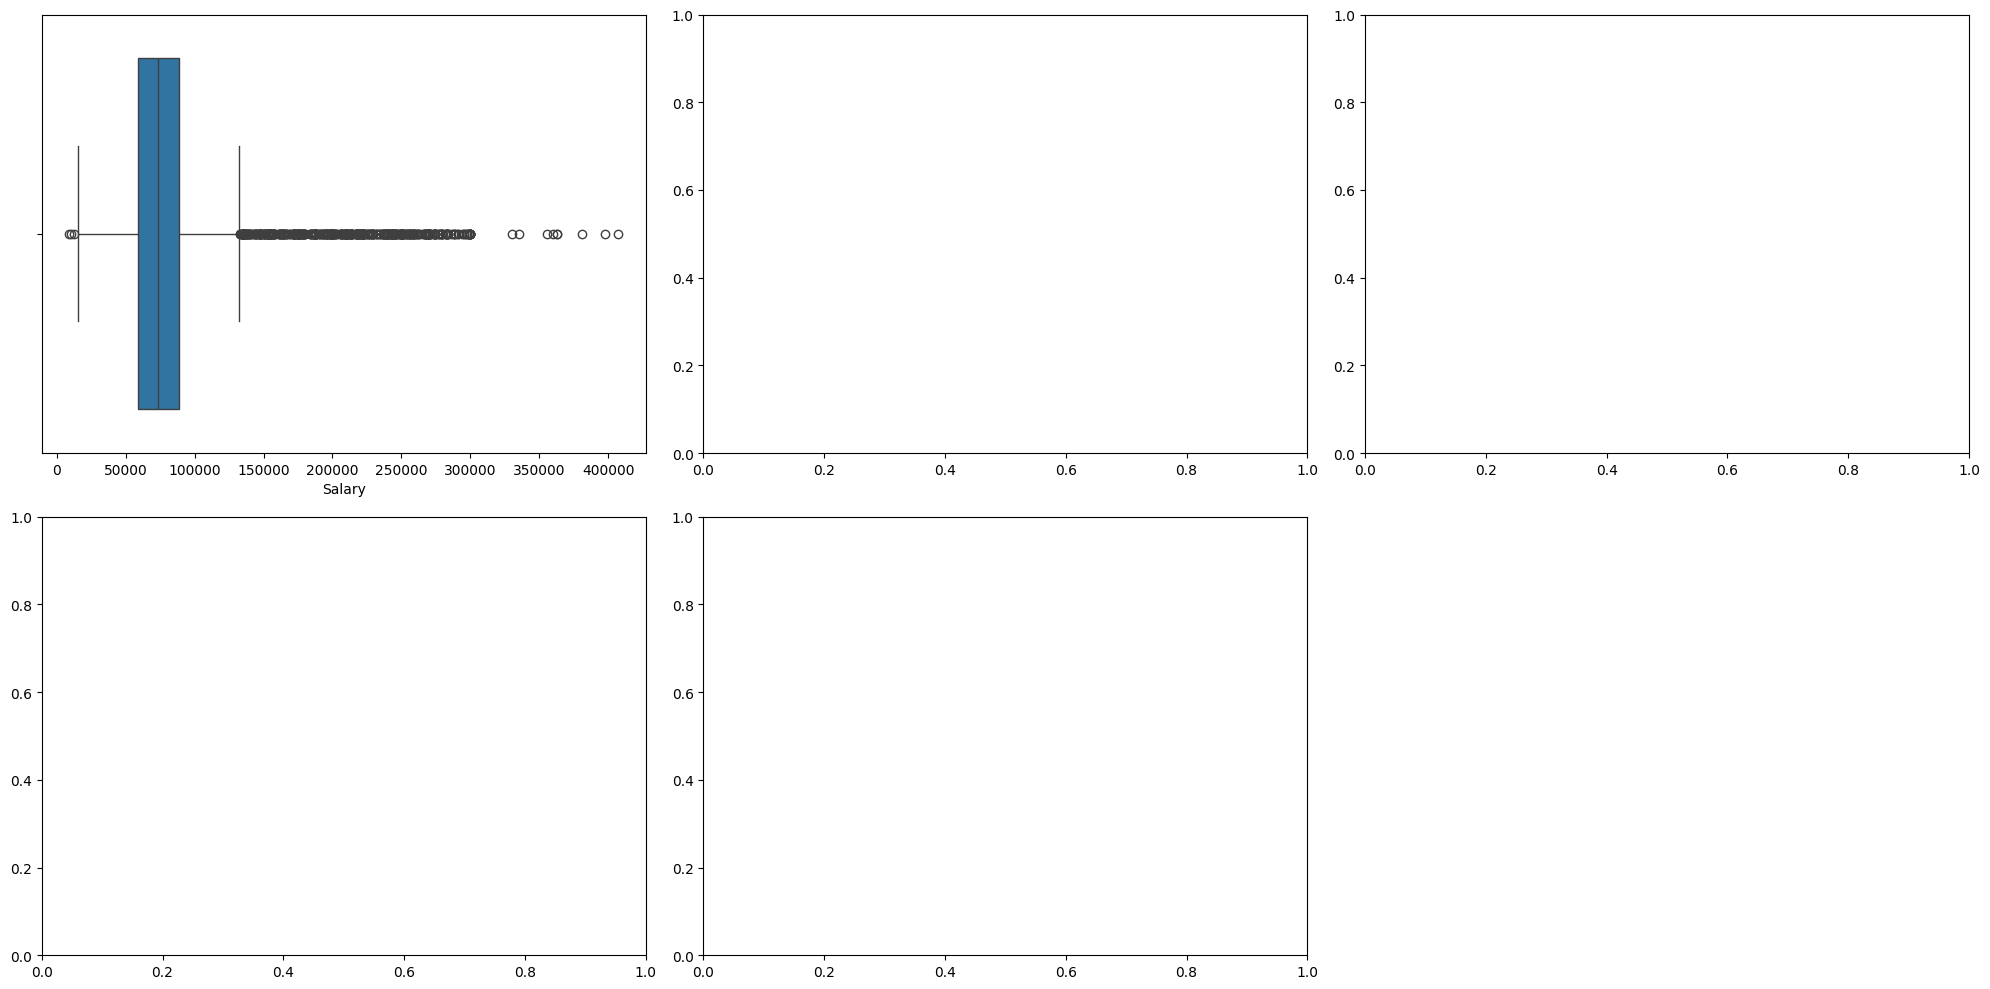

In [25]:
# tiene un 25% de nulos, no es un porcentaje demasiado pequeño como para decidir, sólo con este parámetro si se aplica
# la media. vamos a ver si tiene valores atípicos

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 

axes = axes.flat

sns.boxplot(x = 'Salary', data = df_loyalty, ax = axes[0])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

In [26]:
# vemos que tiene demasiados valores atípicos, por lo que usaremos el KNNimputer

# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_loyalty[['Salary']])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

array([[83236.        ],
       [79359.34090727],
       [79359.34090727],
       ...,
       [79359.34090727],
       [57297.        ],
       [75049.        ]])

In [27]:
# añadimos el array al DataFrame.
df_loyalty[['Salary']] = imputer_knn_imputado


# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_loyalty[['Salary']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
Salary    0
dtype: int64 nulos


In [28]:
df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated'],
      dtype='object')

In [29]:
#pasamo a unir los dos dataframes. Comparten la columna Loyalty Number, pero en el 1er dataframe, esa columna tiene 
# muchos duplicados. primero vamos a intentar solucionar esto. haremos un groupby tomando como referencia la columna 
# 'Loyalty Number' y haciendo una suma del resto de columnas (excepto las de año y mes)

flight_ok = df_flight.groupby('Loyalty Number')[['Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated']].sum()

In [30]:
df_flight_ok = flight_ok.reset_index()
df_flight_ok

,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated
0,100018,157,35,192,50682,5376.00
1,100102,173,42,215,40222,4115.25
2,100140,152,38,190,41252,4184.25
3,100214,79,17,96,33982,3426.00
4,100272,127,36,163,40872,4108.04
...,...,...,...,...,...,...
16732,999902,178,47,225,57227,6056.50
16733,999911,0,0,0,0,0.00
16734,999940,63,23,86,23410,2415.00
16735,999982,22,2,24,5948,594.00


In [31]:
# ahora ya podemos unir los dos dataframes por la columna que tienen en común y no se nos quedará ningún dato atrás.
df_union = df_flight_ok.merge(df_loyalty, how='inner', on='Loyalty Number')

In [32]:
df_union.head(1)

,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,157,35,192,50682,5376.0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [48]:
df_union.shape

(16737, 20)

In [36]:
# Cambiar los nombres de las columnas a minúsculas y los espacios por guion bajo
df_union.columns = df_union.columns.str.lower().str.replace(' ', '_')

# Resultado
df_union.columns

Index(['loyalty_number', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'country',
       'province', 'city', 'postal_code', 'gender', 'education', 'salary',
       'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [37]:
# lo guardamos como un csv para seguir con las siguientes fases
df_union.to_csv("df_union.csv", index = False)

# FASE 2 - VISUALIZACIÓN

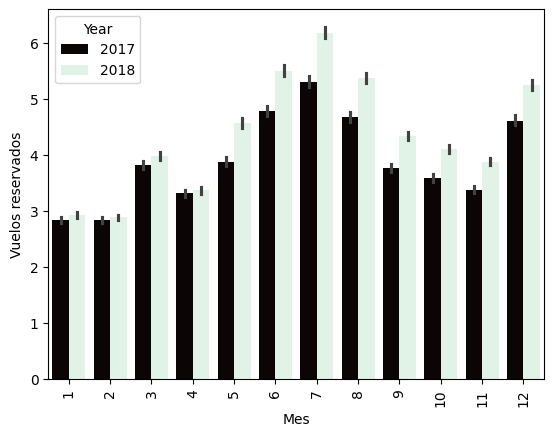

In [38]:
#1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
sns.barplot(x = "Month", 
            y = 'Flights Booked',
              data = df_flight, 
              palette = "mako", 
              order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], 
              hue = "Year")

# giramos las etiquetas del eje "x",  
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados"); 

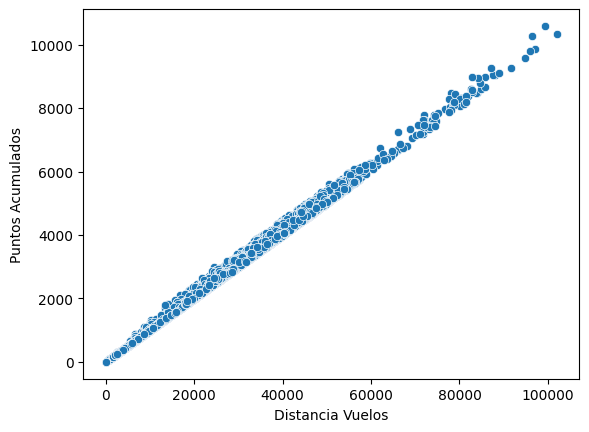

In [39]:
#2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

sns.scatterplot(x = "distance", 
                y = "points_accumulated", 
                data = df_union)

# cambiamos los nombres de los ejes
plt.xlabel("Distancia Vuelos")
plt.ylabel("Puntos Acumulados");
# en el gráfico podemos ver que estas dos variables tienen una relación lineal positiva, es decir, que a mayor distancia
# recorrida en un vuelo mayor número de puntos acumulados

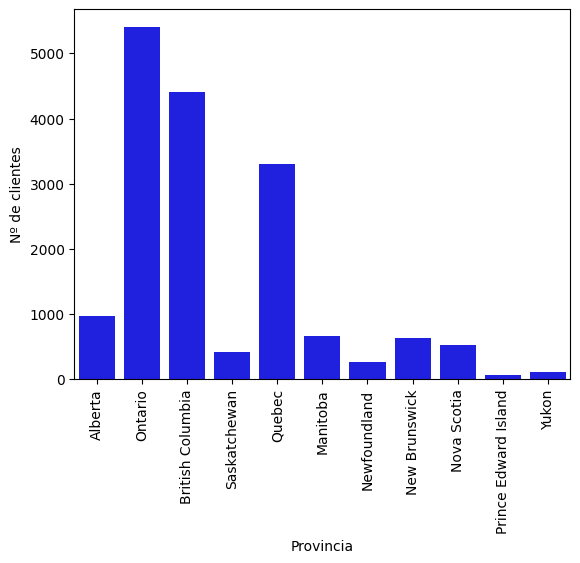

In [40]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado?
sns.countplot(x = "province", 
              data = df_union,
              color = "b", 
             )

# giramos las etiquetas del eje "x", en este caso a 90º. En este caso solo vamos a usar el parámetro 'rotation', 
# más adelante veremos mas ejemplos para usar los otros parámetros. 
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
plt.xlabel("Provincia")
plt.ylabel("Nº de clientes");


In [41]:
# 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
df_salario_educacion = df_union.groupby("education")["salary"].mean().round(2).reset_index()
df_salario_educacion

,education,salary
0,Bachelor,72577.25
1,College,79359.34
2,Doctor,178608.90
3,High School or Below,61199.16
4,Master,103757.85


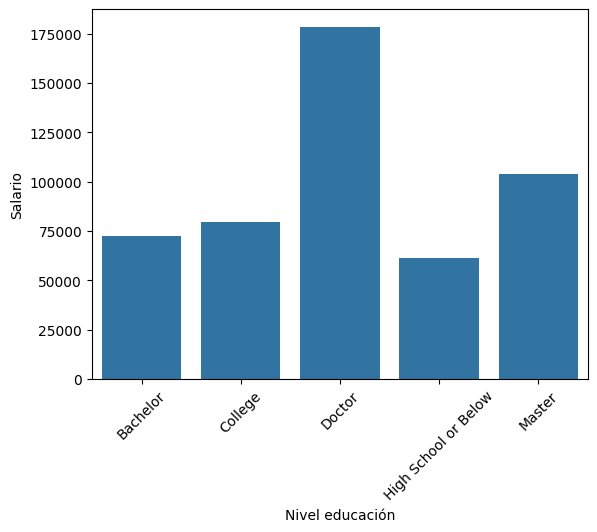

In [42]:
sns.barplot(x = 'education',
            y = 'salary',
            data = df_salario_educacion)
# giramos las etiquetas del eje "x",  
plt.xticks(rotation = 45)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Nivel educación")
plt.ylabel("Salario");

In [43]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
# cuando vimos los valores únicos de las columnas, vimos que habían tres tipos de tarjeta: Star, Aurora y Nova. 
# usaré un pie chart, por lo que primero voy a agrupar los datos que quiero representar
df_tarjetas = df_union.groupby("loyalty_card")["loyalty_number"].count().reset_index()
df_tarjetas

,loyalty_card,loyalty_number
0,Aurora,3429
1,Nova,5671
2,Star,7637


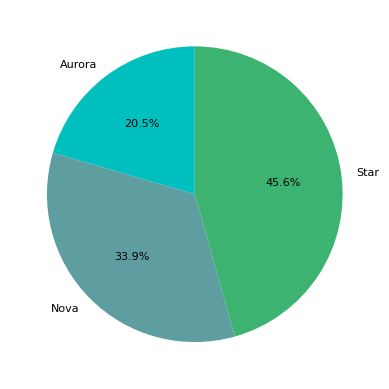

In [44]:
colores = ["c", "cadetblue", "mediumseagreen"]
plt.pie("loyalty_number", labels= "loyalty_card",
        data = df_tarjetas, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

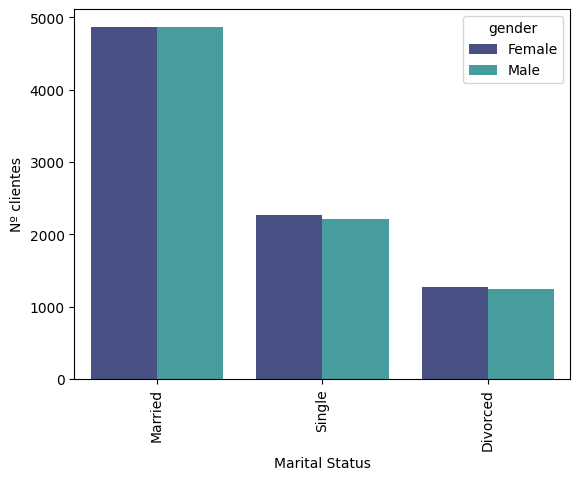

In [45]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?
sns.countplot(x = "marital_status", 
              data = df_union, 
              palette = "mako", 
              hue = "gender")

# giramos las etiquetas del eje "x",  
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Marital Status")
plt.ylabel("Nº clientes"); 

# FASE 3: : Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

In [52]:
# 1º creo un dataframe con las columnas que necesito para el análisis
df_analisis = df_union[['flights_booked', 'education']]
df_analisis

,flights_booked,education
0,157,Bachelor
1,173,College
2,152,College
3,79,Bachelor
4,127,Bachelor
...,...,...
16732,178,College
16733,0,Doctor
16734,63,Bachelor
16735,22,College


In [64]:
media_por_nivel = df_union.groupby('education')['flights_booked'].mean()

print(media_por_nivel)

education
Bachelor                 99.104821
College                 100.613025
Doctor                  100.866485
High School or Below    101.014066
Master                  101.602362
Name: flights_booked, dtype: float64


In [63]:
desviacion_estandar_por_nivel = df_analisis.groupby('education')['flights_booked'].std()

print(desviacion_estandar_por_nivel)

education
Bachelor                54.231557
College                 54.208810
Doctor                  55.933391
High School or Below    54.867491
Master                  54.023146
Name: flights_booked, dtype: float64


In [68]:
percentile_25_75 = np.percentile(df_analisis['flights_booked'], [25, 75])

print(percentile_25_75)

[ 60. 139.]


In [74]:
df_analisis.describe().T

,count,mean,std,min,25%,50%,75%,max
flights_booked,16737.0,99.728984,54.324783,0.0,60.0,113.0,139.0,354.0


In [73]:
df_analisis.describe(include = 'O').T

,count,unique,top,freq
education,16737,5,Bachelor,10475
grupo,16737,2,Basic,11257


In [54]:
df_analisis0 = df_union.groupby("education")["flights_booked"].sum().reset_index()
df_analisis0

,education,flights_booked
0,Bachelor,1038123
1,College,426398
2,Doctor,74036
3,High School or Below,78993
4,Master,51614


In [ ]:
# Establecemos la hipótesis nula (H0): No existe una diferencia significativa en el número de vuelos reservados por los 
# diferentes niveles educativos.

In [71]:
# para realizar la prueba de hipótesis primero debemos crear dos grupos que poder comparar. Para ello creamos una 
# nueva columna con una clasificación de la educación en dos niveles:

education_level = []
for level in df_union['education']:
    if level == 'Bachelor':
        education_level.append('Basic')
    elif level == 'High School or Below':
        education_level.append('Basic')
    elif level == 'College':
        education_level.append('High')
    elif level == 'Doctor':
        education_level.append('High')
    else:
        education_level.append('High')

df_union['grupo'] = education_level

In [72]:
df_union.head(1)

,loyalty_number,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,grupo
0,100018,157,35,192,50682,5376.0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,Basic


In [85]:
df_analisis0 = df_union.groupby("grupo")["flights_booked"].sum().reset_index()
df_analisis0

,grupo,flights_booked
0,Basic,1117116
1,High,552048


In [86]:
df_union.groupby('grupo')['loyalty_number'].count()

grupo
Basic    11257
High      5480
Name: loyalty_number, dtype: int64

In [ ]:
# Del total de clientes (16737), 11257 que corresponden al grupo de educación básica (67,26%) realizaron 1117116 (66,93%)
#  reservas (de un total de 1669164)